# Plotting and Graphs

### Create a Histogram with Matplotlib and Seaborn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# sample data
sample_data = pd.read_csv('sample-data/stroopdata.csv')
sample_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


About fix, ax = plt.subplots() from [Stack Overflow](http://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python):

---
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)

---

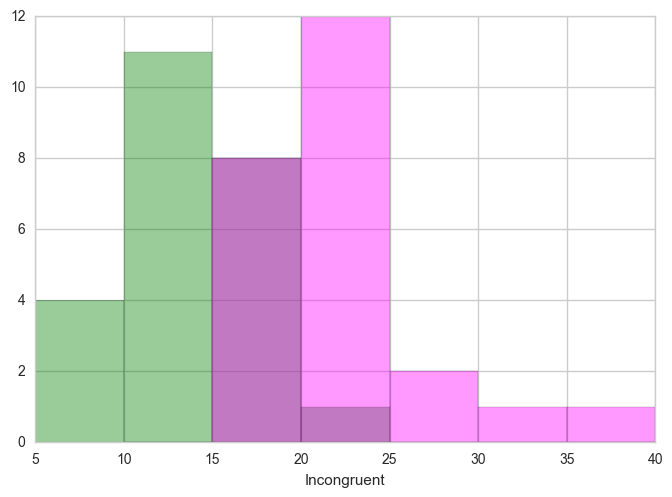

In [6]:
# the Congruent column (a Pandas Series)
cong = sample_data['Congruent']
# the Incongruent column (also a Pandas Series)
incong = sample_data['Incongruent']

# matplotlib creating the figure for plotting
fig, ax = plt.subplots()

# two plots, one figure
# note, kde is whether to plot a gaussian kernel density estimate
sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax, kde=False)
sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax, kde=False)

plt.show()

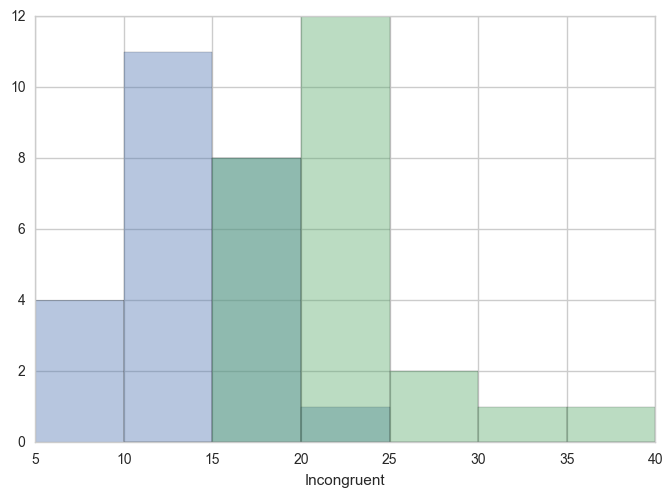

In [7]:
# use a for loop to create multiple plots on one figure
# colors chosen automatically

fig, ax = plt.subplots()

for a in [cong,incong]:
    sns.distplot(a, bins=range(5,45,5), ax=ax, kde=False)
    
plt.show()

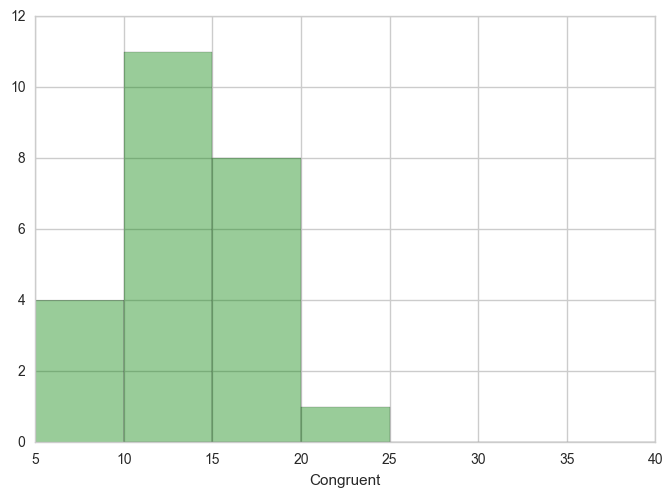

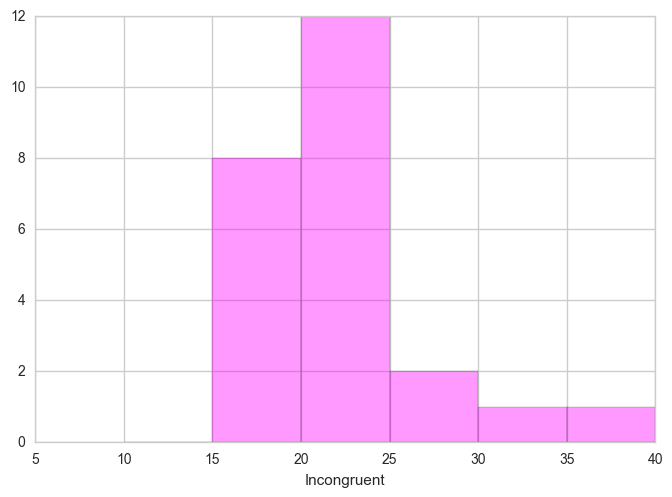

In [8]:
# make two figures and two plots
fig, ax = plt.subplots()
fig, az = plt.subplots()

# two plots, one figure
sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax, kde=False)
sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=az, kde=False)

plt.show()

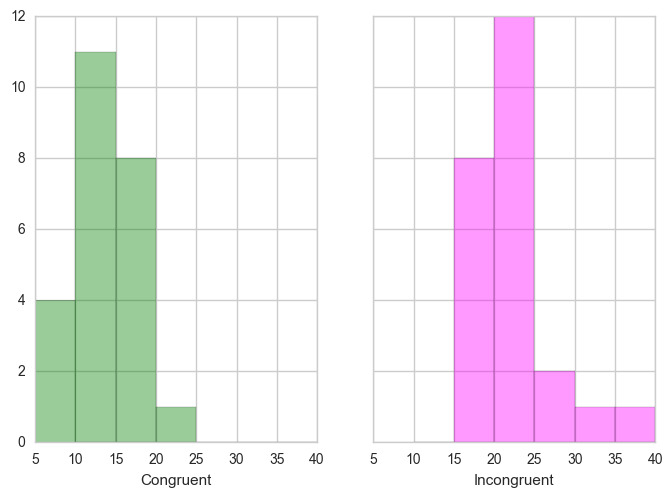

In [9]:
# two plots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax1, kde=False)
sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax2, kde=False)

plt.show()

### Create a Boxplot or Swarmplot with Seaborn and Matplotlib

Box plots take up less space and are therefore particularly useful for comparing distributions between several groups or sets of data. The whiskers show the spread of the data (the range of the data). Red line in the middle is the median. Half of the data is on one side and half is on the other. Either side of the box is the median for either half. There are four chunks such that they make up the four quartiles.

[seaborn.boxplot](http://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [10]:
import seaborn as sns
sns.set_style("whitegrid")

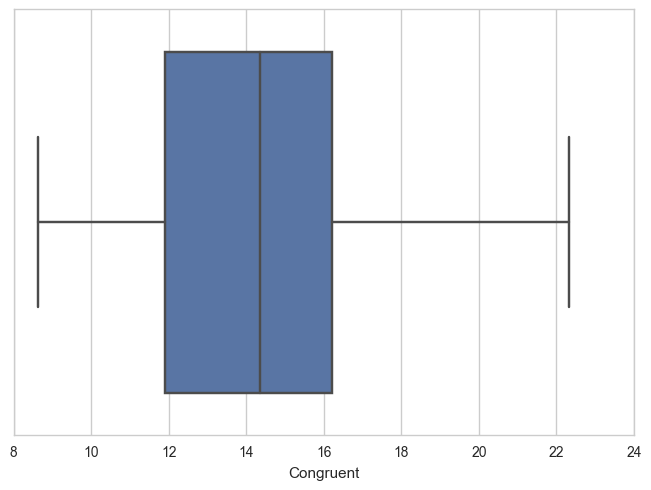

In [11]:
# Horizontal with single variable
ax = sns.boxplot(x=sample_data['Congruent'])
plt.show()

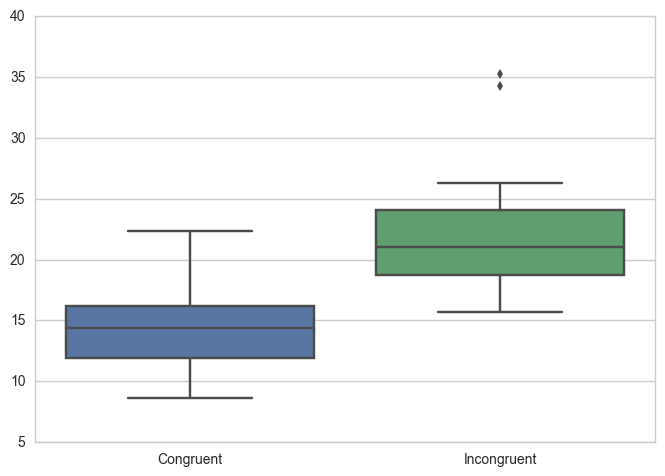

In [12]:
# Multiple variables vertical
ax = sns.boxplot(data=sample_data)
plt.show()

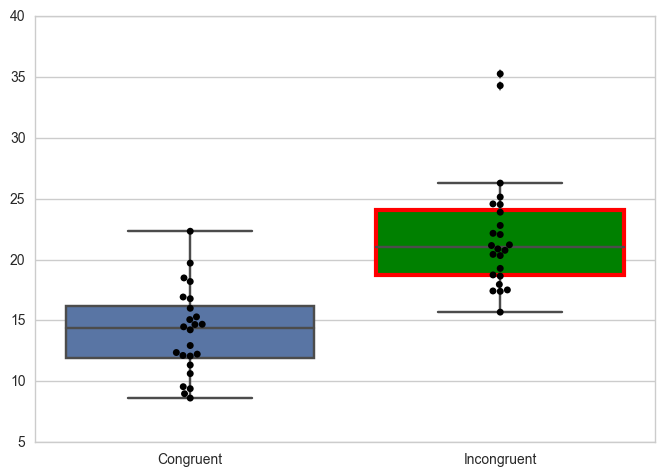

In [20]:
# Multiple variables vertical swarmplot with selected styling
ax = sns.boxplot(data=sample_data)
ax = sns.swarmplot(data=sample_data, color='.0')

mybox = ax.artists[1]

mybox.set_facecolor('green')
mybox.set_edgecolor('red')
mybox.set_linewidth(3)

plt.show()

### Quantile Quantile plots with Scipy and Matplotlib
Is a set of observations normally distributed? Important b/c many statistical inference procedures assume we are sampling from a normally disttributed population. If so, the 'normal quantile-quantile (QQ) plot' of the observations will result in an approximately straight line.

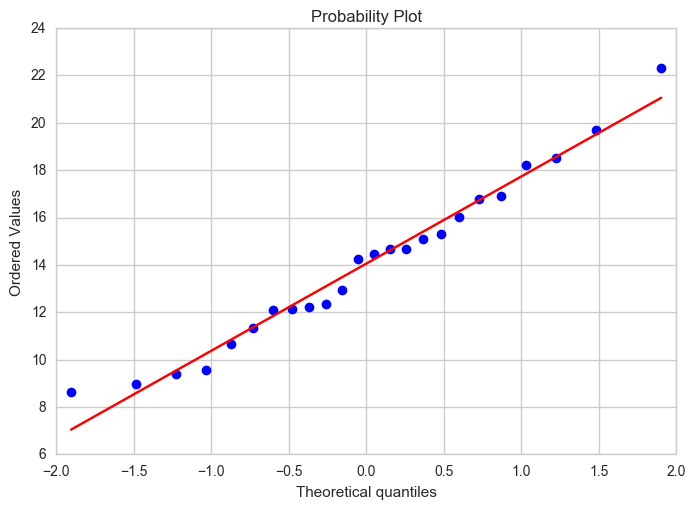

In [21]:
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(sample_data['Congruent'], plot=plt)
plt.show()